# Advanced street network plotting with OSMnx

Author: [Geoff Boeing](https://geoffboeing.com/)

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [1]:
import matplotlib.pyplot as plt
import osmnx as ox

ox.__version__

'1.9.2'

In [2]:
place = "Piedmont, California, USA"
G = ox.graph_from_place(place, network_type="drive")

## Color helper functions

You can use the plot module to get colors for plotting.

In [3]:
# get n evenly-spaced colors from some matplotlib colormap
ox.plot.get_colors(n=5, cmap="plasma")

[(0.050383, 0.029803, 0.527975, 1.0),
 (0.494877, 0.01199, 0.657865, 1.0),
 (0.798216, 0.280197, 0.469538, 1.0),
 (0.973416, 0.585761, 0.25154, 1.0),
 (0.940015, 0.975158, 0.131326, 1.0)]

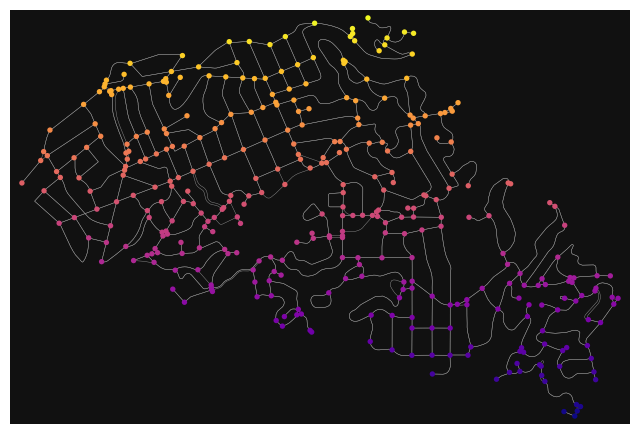

In [4]:
# get node colors by linearly mapping an attribute's values to a colormap
nc = ox.plot.get_node_colors_by_attr(G, attr="y", cmap="plasma")
fig, ax = ox.plot_graph(G, node_color=nc, edge_linewidth=0.3)

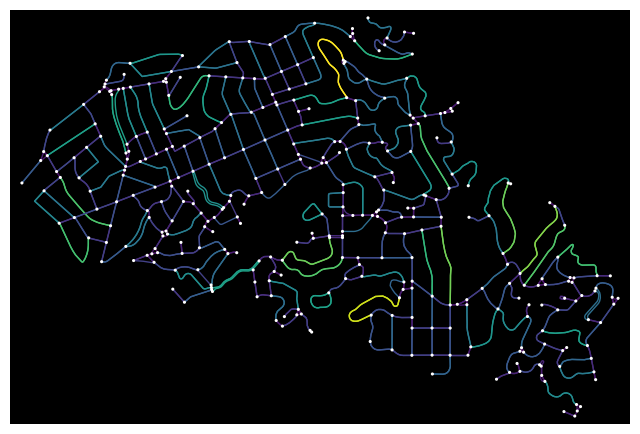

In [5]:
# when num_bins is not None, bin the nodes/edges then assign one color to each bin
# also set equal_size=True for equal-sized quantiles (requires unique bin edges!)
ec = ox.plot.get_edge_colors_by_attr(G, attr="length", num_bins=5)

# otherwise, when num_bins is None (default), linearly map one color to each node/edge by value
ec = ox.plot.get_edge_colors_by_attr(G, attr="length")

# plot the graph with colored edges
fig, ax = ox.plot_graph(G, node_size=5, edge_color=ec, bgcolor="k")

## Other plotting options

See the [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.plot.plot_graph) for full details.

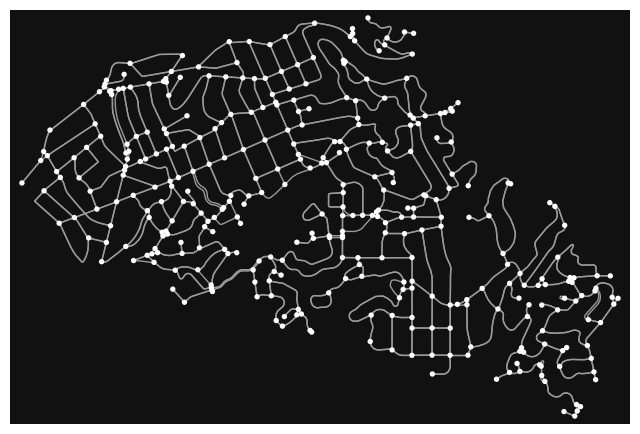

In [6]:
fig, ax = ox.plot_graph(
    G,
    ax=None,  # optionally draw on pre-existing axis
    figsize=(8, 8),  # figure size to create if ax is None
    bgcolor="#111111",  # background color of the plot
    node_color="w",  # color of the nodes
    node_size=15,  # size of the nodes: if 0, skip plotting them
    node_alpha=None,  # opacity of the nodes
    node_edgecolor="none",  # color of the nodes' markers' borders
    node_zorder=1,  # zorder to plot nodes: edges are always 1
    edge_color="#999999",  # color of the edges
    edge_linewidth=1,  # width of the edges: if 0, skip plotting them
    edge_alpha=None,  # opacity of the edges
    show=True,  # if True, call pyplot.show() to show the figure
    close=False,  # if True, call pyplot.close() to close the figure
    save=False,  # if True, save figure to disk at filepath
    filepath=None,  # if save is True, the path to the file
    dpi=300,  # if save is True, the resolution of saved file
    bbox=None,  # bounding box to constrain plot
)

Use bbox to constrain the plot (i.e., "zoom") to some precise section of the graph.

For example, perhaps we consolidated nearby intersections to clean-up node clusters and want to inspect our results:

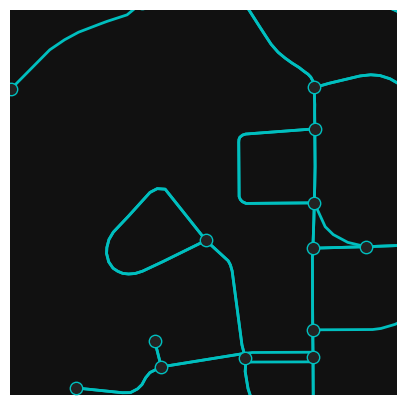

In [7]:
Gc = ox.consolidate_intersections(ox.project_graph(G), dead_ends=True)
c = ox.graph_to_gdfs(G, edges=False).unary_union.centroid
bbox = ox.utils_geo.bbox_from_point(point=(c.y, c.x), dist=200, project_utm=True)
fig, ax = ox.plot_graph(
    Gc,
    figsize=(5, 5),
    bbox=bbox,
    edge_linewidth=2,
    edge_color="c",
    node_size=80,
    node_color="#222222",
    node_edgecolor="c",
)

In [8]:
# or save a figure to disk instead of showing it
fig, ax = ox.plot_graph(G, filepath="./images/image.png", save=True, show=False, close=True)

## Plot routes

In [9]:
# impute missing edge speeds and calculate free-flow travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# calculate 3 shortest paths, minimizing travel time
w = "travel_time"
orig, dest = list(G)[10], list(G)[-10]
route1 = ox.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[0], list(G)[-1]
route2 = ox.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[-100], list(G)[100]
route3 = ox.shortest_path(G, orig, dest, weight=w)

Plot a route with the `plot_graph_route` function.

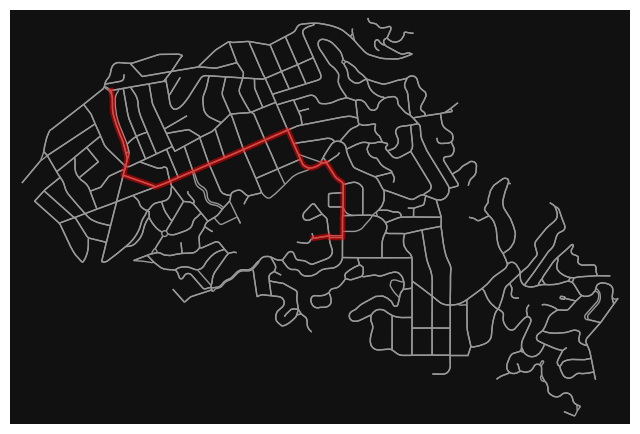

In [10]:
fig, ax = ox.plot_graph_route(G, route1, orig_dest_size=0, node_size=0)

In [11]:
# you can also pass any ox.plot_graph parameters as additional keyword args
fig, ax = ox.plot_graph_route(G, route1, save=True, show=False, close=True)

Or plot multiple routes with the `plot_graph_routes` function.

If you provide a list of route colors, each route will receive its own color.

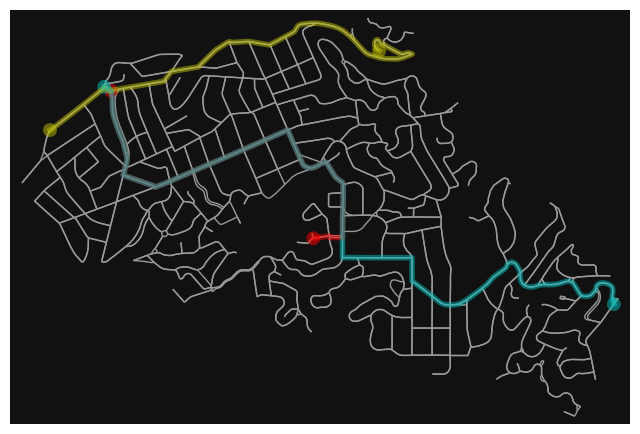

In [12]:
routes = [route1, route2, route3]
rc = ["r", "y", "c"]
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0)

## Annotate a graph's plot

Here we label each street segment with its name. Similar logic would apply to labeling nodes instead.

In [13]:
G2 = ox.graph_from_address("Piedmont, CA, USA", dist=200, network_type="drive")
G2 = ox.convert.to_undirected(G2)

/tmp/ipykernel_119786/3466374535.py:2: DeprecationWarning: ExtensionArray.fillna added a 'copy' keyword in pandas 2.1.0. In a future version, ExtensionArray subclasses will need to implement this keyword or an exception will be raised. In the interim, the keyword is ignored by GeometryArray.
  for _, edge in ox.graph_to_gdfs(G2, nodes=False).fillna("").iterrows():


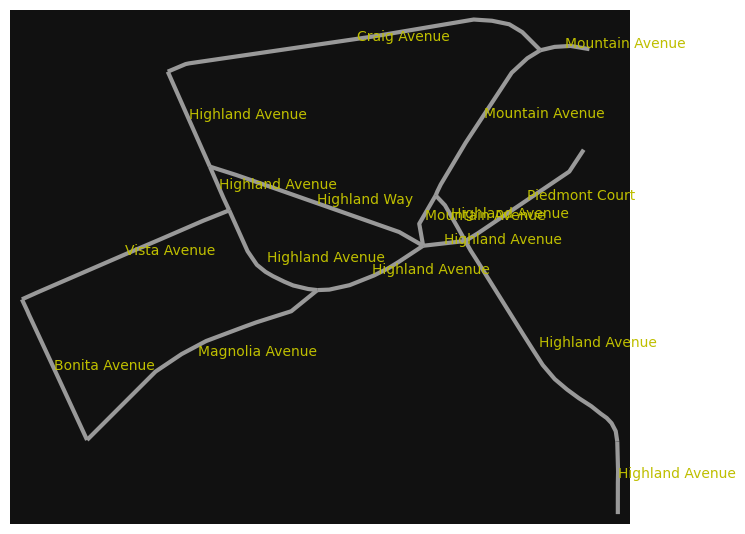

In [14]:
fig, ax = ox.plot_graph(G2, edge_linewidth=3, node_size=0, show=False, close=False)
for _, edge in ox.graph_to_gdfs(G2, nodes=False).fillna("").iterrows():
    text = edge["name"]
    c = edge["geometry"].centroid
    ax.annotate(text, (c.x, c.y), c="y")
plt.show()

## Plot footprints

The `plot_footprints` function lets you plot OSM geospatial features (Polygons and MultiPolygons).

In [17]:
import osmnx as ox
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

# Define the place you want to get building footprints for
place = "Piedmont, California, USA"

# Retry logic with increased timeout
max_retries = 3
timeout_value = 60  # Increased timeout to 60 seconds

# Create a session with retry logic and timeout
session = requests.Session()
retry_strategy = Retry(
    total=max_retries,
    backoff_factor=1,
    status_forcelist=[429, 500, 502, 503, 504],
)
adapter = HTTPAdapter(max_retries=retry_strategy)
session.mount("http://", adapter)
session.mount("https://", adapter)

for _ in range(max_retries):
    try:
        # Fetch data using requests
        response = session.get(
            f"https://overpass-api.de/api/interpreter?data=[out:json][timeout:{timeout_value}];area[name='{place}']->.searchArea;(way['building'](area.searchArea););out;"
        )
        response.raise_for_status()  # Raise an exception for non-200 status codes
        data = response.json()
        gdf = ox.create_geodataframe(data)
        print("Number of building footprints:", len(gdf))
        break  # Exit the loop if successful
    except Exception as e:
        print("An error occurred:", e)
        print("Retrying...")

# If all retries fail, print an error message
else:
    print("Max retries exceeded. Unable to fetch building footprints.")


An error occurred: module 'osmnx' has no attribute 'create_geodataframe'
Retrying...
An error occurred: module 'osmnx' has no attribute 'create_geodataframe'
Retrying...
An error occurred: module 'osmnx' has no attribute 'create_geodataframe'
Retrying...
Max retries exceeded. Unable to fetch building footprints.


In [18]:
# get all the building footprints in a city
gdf = ox.features_from_place("Piedmont, California, USA", {"building": True})
gdf.shape

(4759, 43)

/home/kogzqwerty2798/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/kogzqwerty2798/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


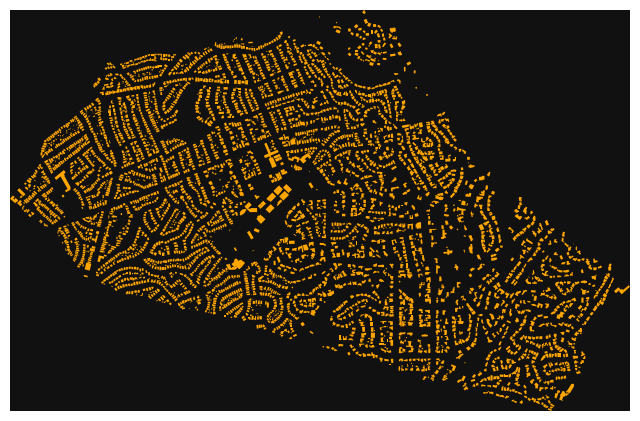

In [19]:
fig, ax = ox.plot_footprints(gdf)

/home/kogzqwerty2798/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/kogzqwerty2798/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/kogzqwerty2798/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


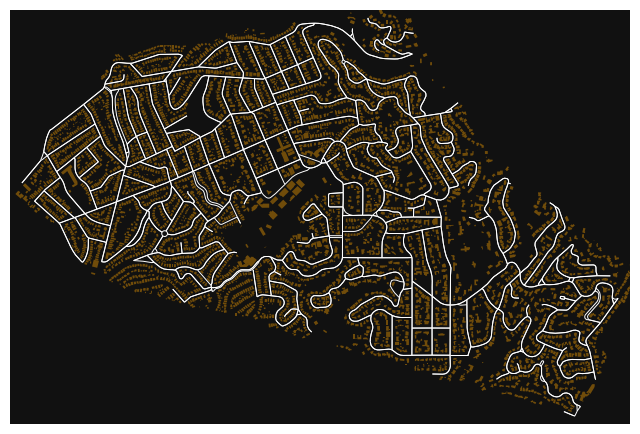

In [20]:
# or plot street network and the geospatial features' footprints together
fig, ax = ox.plot_footprints(gdf, alpha=0.4, show=False)
fig, ax = ox.plot_graph(G, ax=ax, node_size=0, edge_color="w", edge_linewidth=0.7)